<a href="https://colab.research.google.com/github/ericycheng8/AI4CCEE_Fall_2024/blob/main/in_class_activity/Lecture5/In_Class_Activity_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Car_Speed.csv to Car_Speed (3).csv


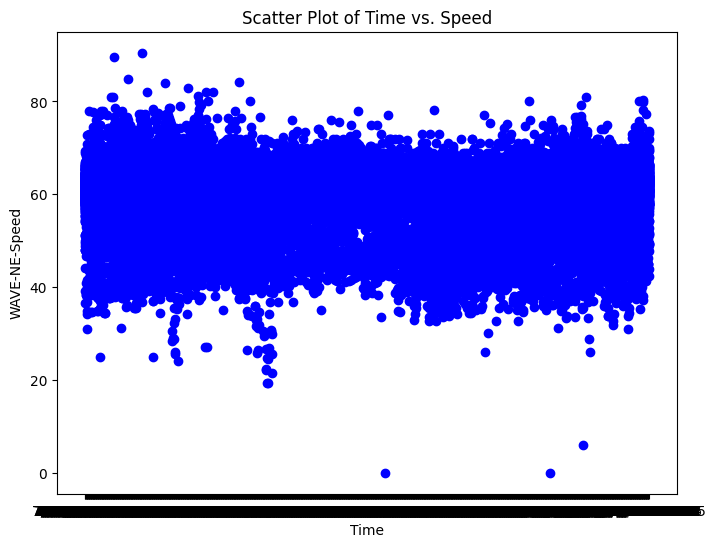

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Read the CSV file into a pandas DataFrame
df = pd.read_csv(list(uploaded.keys())[0])  # Read the uploaded file

# Step 4: Check the first few rows to understand the structure
df.head()

# Step 5: Plot a scatter plot (assuming 'time' and 'speed' columns are present)
plt.figure(figsize=(8, 6))
plt.scatter(df['Time'], df['WAVE-NE-Speed'], color='blue')

# Step 6: Add labels and title
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Scatter Plot of Time vs. Speed')

# Step 7: Show the plot
plt.show()

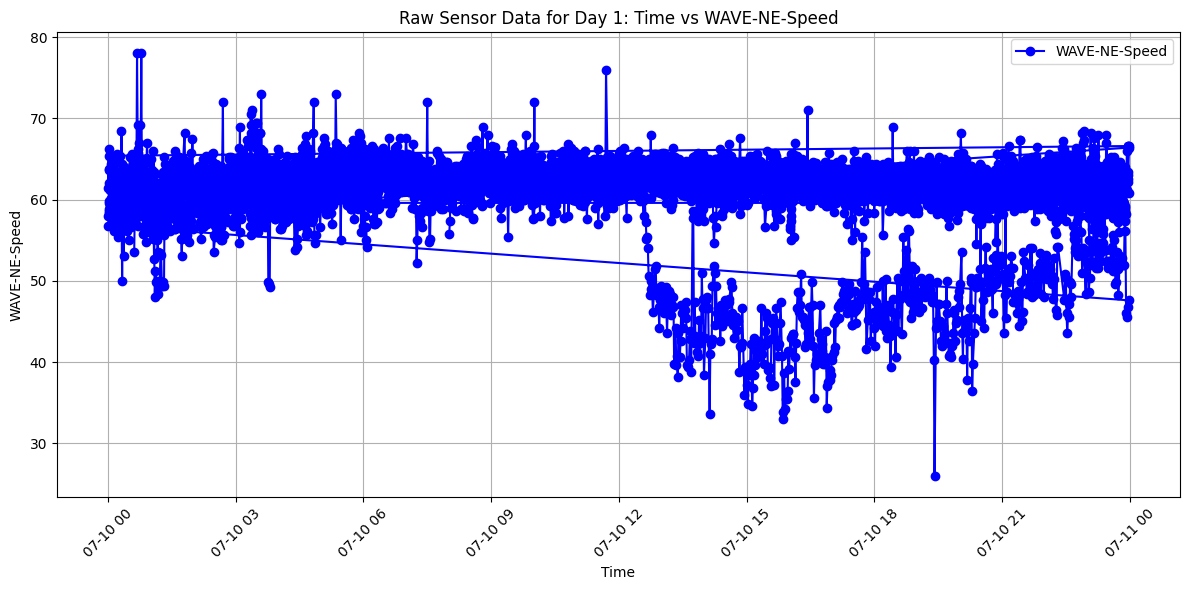

In [ ]:
df = pd.read_csv('/content/Car_Speed.csv')
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M')
df.head()
df_day1 = df[df['day'] == 1]
df_day1.head()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_day1['Time'], df_day1['WAVE-NE-Speed'], color='blue', marker='o', linestyle='-', label='WAVE-NE-Speed')
plt.xlabel('Time')
plt.ylabel('WAVE-NE-Speed')
plt.title('Raw Sensor Data for Day 1: Time vs WAVE-NE-Speed')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Missing Values Summary:
 day                 0
Time                0
WAVE-NE-Count    4724
WAVE-NE-Speed    4724
WAVE-SW-Count    4435
WAVE-SW-Speed    4435
Month               0
Year                0
dtype: int64
Missing values after interpolation:
 day                 0
Time                0
WAVE-NE-Count    4724
WAVE-NE-Speed       1
WAVE-SW-Count    4435
WAVE-SW-Speed    4435
Month               0
Year                0
dtype: int64
Number of duplicate rows: 0
Number of duplicate rows after cleaning: 0
Data size after removing unreasonable speed values: (223047, 8)


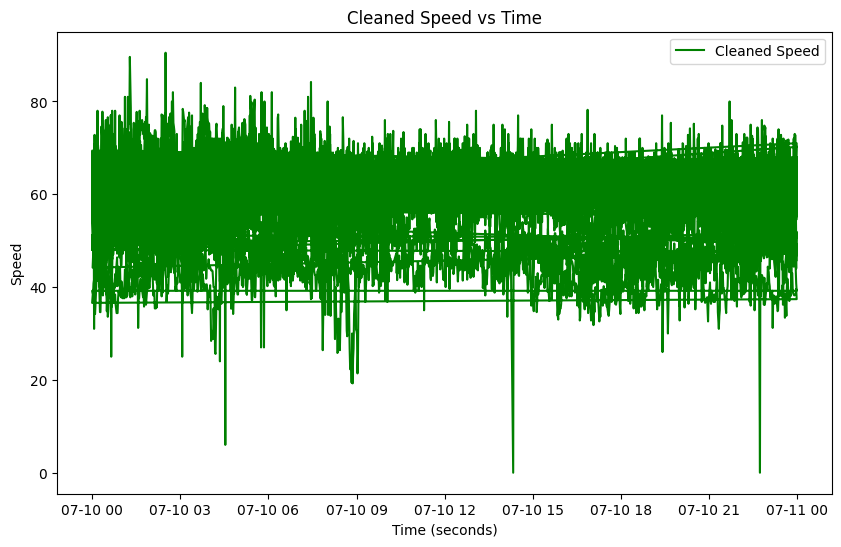

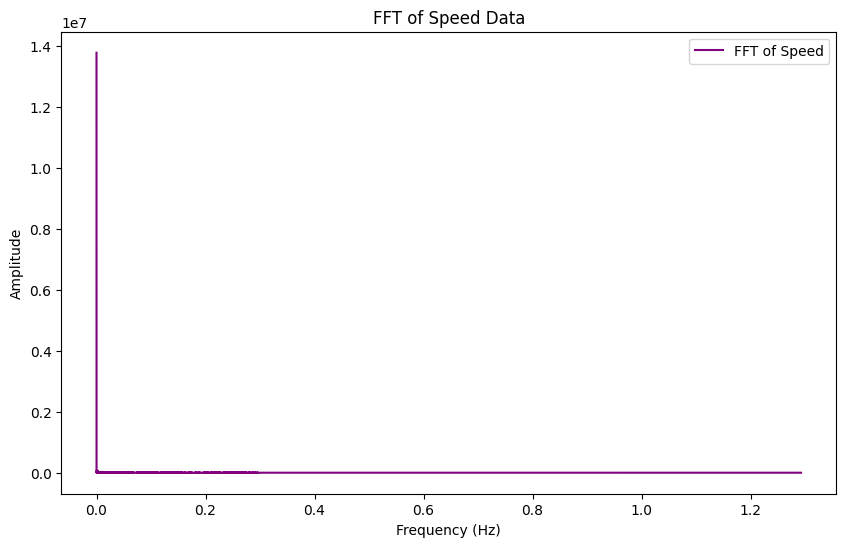

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Upload and Load the Data
data = pd.read_csv('/content/Car_Speed.csv')

# Step 2: Check for Missing Data
missing_values = data.isnull().sum()
print("Missing Values Summary:\n", missing_values)

# Step 3: Fill Missing Values Using Interpolation
data['WAVE-NE-Speed'] = data['WAVE-NE-Speed'].interpolate() # Changed 'speed' to 'WAVE-NE-Speed
print("Missing values after interpolation:\n", data.isnull().sum())

# Step 4: Remove Duplicate Rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data_cleaned = data.drop_duplicates()
print(f"Number of duplicate rows after cleaning: {data_cleaned.duplicated().sum()}")

# Step 5: Remove Speed Values Outside a Reasonable Range
min_speed = 0
max_speed = 120
data_cleaned = data_cleaned[(data_cleaned['WAVE-NE-Speed'] >= min_speed) & (data_cleaned['WAVE-NE-Speed'] <= max_speed)] # Changed 'speed' to 'WAVE-NE-Speed
print(f"Data size after removing unreasonable speed values: {data_cleaned.shape}")

# Step 6: Plot the Cleaned Data
# Convert 'Time' column to datetime
# This ensures that time differences can be calculated correctly
data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], format='%m/%d/%Y %H:%M')

plt.figure(figsize=(10, 6))
plt.plot(data_cleaned['Time'], data_cleaned['WAVE-NE-Speed'], label='Cleaned Speed', color='green') # Changed 'time' to 'Time' and 'speed' to 'WAVE-NE-Speed'
plt.xlabel('Time (seconds)')
plt.ylabel('Speed')
plt.title('Cleaned Speed vs Time')
plt.legend()
plt.show()

# Step 7: Apply the FFT to the Cleaned Data
speed_fft = np.fft.fft(data_cleaned['WAVE-NE-Speed']) # Changed 'speed' to 'WAVE-NE-Speed
n = len(speed_fft)

# Calculate time differences using the converted datetime objects
frequencies = np.fft.fftfreq(n, d=(data_cleaned['Time'].diff().dt.total_seconds().mean())) # Changed 'time' to 'Time

# Plot the FFT (Frequency Domain)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:n//2], np.abs(speed_fft)[:n//2], label='FFT of Speed', color='purple')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of Speed Data')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 2: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Read the CSV file into a pandas DataFrame
df = pd.read_csv(list(uploaded.keys())[0])  # Read the uploaded file

# Step 4: Check the first few rows to understand the structure
df.head()

# Step 5: Split the dataset into training and testing sets
# Assuming 'time' is the feature and 'speed' is the target
X = df[['Time']]  # Features (as a DataFrame)
y = df['WAVE-NE-Speed']   # Target (as a Series)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Check the sizes of the resulting sets
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")

Saving Car_Speed.csv to Car_Speed (4).csv
Training Set Size: 178438 samples
Testing Set Size: 44610 samples


Saving Car_Speed.csv to Car_Speed (7).csv
Mean Squared Error (MSE): 12.68601454267834
R-squared (R²): 0.00011739372016239535


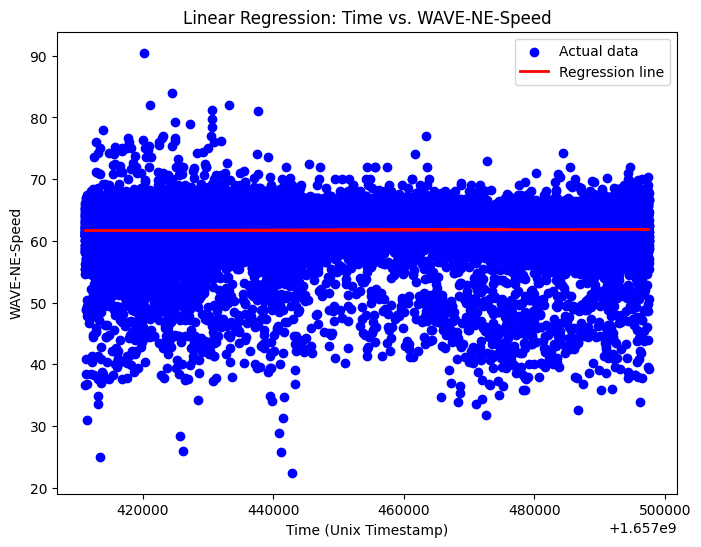

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Read the CSV file into a pandas DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Step 4: Check the first few rows to understand the structure
df.head()

# Step 5: Define the features (X) and target (y)
# Convert 'Time' to numerical representation (e.g., Unix timestamp)
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M') # Convert to datetime objects
df['Time_Numeric'] = df['Time'].astype('int64') // 10**9  # Convert to Unix timestamp (seconds)

# *** Handle missing values before splitting ***
# Drop rows with NaN in 'WAVE-NE-Speed'
df = df.dropna(subset=['WAVE-NE-Speed'])

X = df[['Time_Numeric']]  # Use the numerical 'Time_Numeric' column as feature
y = df['WAVE-NE-Speed']   # Target column

# Step 6: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Step 10: Visualize the results
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Time (Unix Timestamp)') # Update x-axis label
plt.ylabel('WAVE-NE-Speed')
plt.title('Linear Regression: Time vs. WAVE-NE-Speed')
plt.legend()
plt.show()

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Read the CSV file into a pandas DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Step 4: Check the first few rows to understand the structure
df.head()

# Step 5: Define the features (X) and target (y)
# Convert 'Time' to numerical representation (e.g., Unix timestamp)
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M') # Convert to datetime objects
df['Time_Numeric'] = df['Time'].astype('int64') // 10**9  # Convert to Unix timestamp (seconds)

# *** Handle missing values BEFORE splitting ***
# Drop rows with NaN in 'WAVE-NE-Speed'
df = df.dropna(subset=['WAVE-NE-Speed'])

X = df[['Time_Numeric']]  # Use the numerical time representation as feature
y = df['WAVE-NE-Speed']   # Target

# Step 6: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and train the linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Evaluate the model's performance using the test data
y_pred = model.predict(X_test)

# Step 9: Calculate performance metrics (MSE and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Saving Car_Speed.csv to Car_Speed (10).csv
Mean Squared Error (MSE): 12.68601454267834
R-squared (R²): 0.00011739372016239535


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Step 2: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# Step 3: Read the CSV file into a pandas DataFrame
df = pd.read_csv(list(uploaded.keys())[0])

# Step 4: Check the first few rows to understand the structure
df.head()

# Step 5: Define the features (X) and target (y)
# Convert 'Time' to numerical representation (e.g., Unix timestamp)
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M') # Convert to datetime objects
df['Time_Numeric'] = df['Time'].astype('int64') // 10**9  # Convert to Unix timestamp (seconds)

# *** Handle missing values BEFORE splitting ***
# Drop rows with NaN in 'WAVE-NE-Speed'
df = df.dropna(subset=['WAVE-NE-Speed'])  # Move this line before splitting

# Assuming 'time' and 'speed' are columns in the CSV
X = df[['Time_Numeric']]  # Use the numerical time representation as feature
y = df['WAVE-NE-Speed']   # Target

# Step 6: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and train the linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Calculate performance metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE) - square root of MSE
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Saving Car_Speed.csv to Car_Speed (14).csv
Mean Absolute Error (MAE): 2.2155461418674594
Mean Squared Error (MSE): 12.68601454267834
Root Mean Squared Error (RMSE): 3.5617431887600124
R-squared (R²): 0.00011739372016239535


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the CSV file
df = pd.read_csv('/content/Car_Speed.csv')  # Replace 'your_file.csv' with your actual CSV file path

# Step 3: Select relevant features for clustering
# Replace 'Time' and 'Speed' with the actual column names from your dataset
# Convert 'Time' to numerical representation (e.g., Unix timestamp)
df['Time_Numeric'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M').astype('int64') // 10**9  # Convert to Unix timestamp (seconds)
X = df[['Time_Numeric', 'WAVE-NE-Speed']]

# *** Handle missing values BEFORE clustering ***
# Drop rows with NaN in either 'Time_Numeric' or 'WAVE-NE-Speed'
X = X.dropna()

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply KMeans clustering (with 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
# Use the index from X to assign clusters back to the original DataFrame
df['Cluster'] = pd.Series(kmeans.fit_predict(X_scaled), index=X.index)

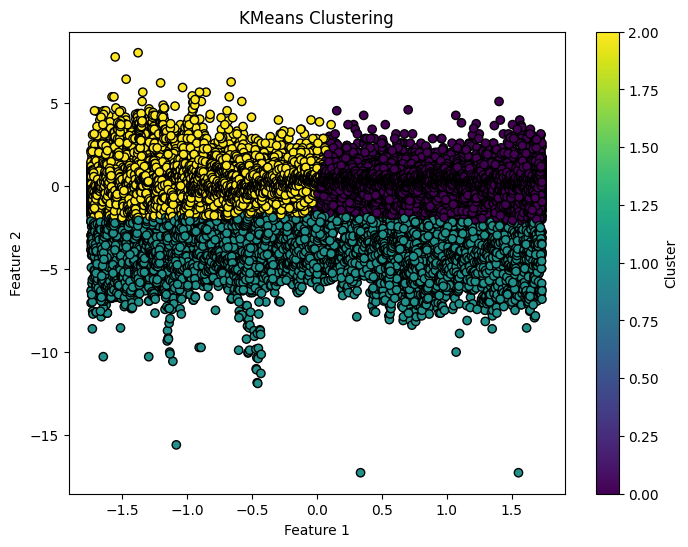

In [ ]:
# Step 6: Visualize the clusters
plt.figure(figsize=(8, 6))

# Use the 'Cluster' values corresponding to the data points in X_scaled
# Filter df['Cluster'] using the index of X (which was used to create X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df.loc[X.index, 'Cluster'], cmap='viridis', marker='o', edgecolor='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# ... (Previous code in the cell) ...

# --- Code from ipython-input-5-f1eb9be41682 ---
# Step 2: Load the CSV file
df = pd.read_csv('/content/Car_Speed.csv')  # Replace 'your_file.csv' with your actual CSV file path

# Step 3: Select relevant features for clustering
# Replace 'Time' and 'Speed' with the actual column names from your dataset
# Convert 'Time' to numerical representation (e.g., Unix timestamp)
df['Time_Numeric'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M').astype('int64') // 10**9  # Convert to Unix timestamp (seconds)
X = df[['Time_Numeric', 'WAVE-NE-Speed']]

# *** Handle missing values BEFORE clustering ***
# Drop rows with NaN in either 'Time_Numeric' or 'WAVE-NE-Speed'
X = X.dropna()

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Define X_scaled
# --- End of code from ipython-input-5-f1eb9be41682 ---


# Step 7: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['DBSCAN_Cluster'], cmap='plasma', marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 8: Perform hierarchical clustering
Z = linkage(X_scaled, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

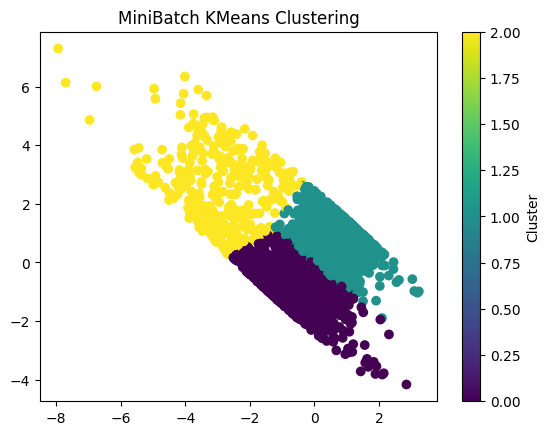

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

# Step 1: Load and sample data
df = pd.read_csv('/content/Car_Speed.csv')
df_sample = df.sample(n=10000, random_state=42)

# Step 2: Select features and scale them
# Use 'Time_Numeric' instead of 'Time' for scaling
df_sample['Time_Numeric'] = pd.to_datetime(df_sample['Time'], format='%m/%d/%Y %H:%M').astype('int64') // 10**9  # Convert to Unix timestamp (seconds)
X = df_sample[['Time_Numeric', 'WAVE-NE-Speed']]  # Changed to the correct column names

# *** Handle missing values BEFORE scaling and PCA ***
X = X.dropna()  # Drop rows with NaN in either 'Time_Numeric' or 'WAVE-NE-Speed'

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce dimensions using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Step 4: Apply MiniBatchKMeans clustering
mini_kmeans = MiniBatchKMeans(n_clusters=3, batch_size=1000, random_state=42)
# Ensure you are using the correct DataFrame for cluster assignment
clusters = mini_kmeans.fit_predict(X_reduced)
X['Cluster'] = clusters # Adding cluster labels to X
df_sample = df_sample.merge(X[['Time_Numeric', 'WAVE-NE-Speed', 'Cluster']], on=['Time_Numeric', 'WAVE-NE-Speed'], how='left')


# Step 5: Visualize the KMeans clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis') # Using clusters for visualization
plt.title('MiniBatch KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# prompt: convert xls to csv

!pip install xlrd
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  try:
    df = pd.read_excel(fn)
    csv_filename = fn.replace('.xls', '.csv')
    df.to_csv(csv_filename, index=False)
    print(f"Successfully converted '{fn}' to '{csv_filename}'")
  except Exception as e:
    print(f"Error converting '{fn}': {e}")


Saving Ames_August_Crashes.xls to Ames_August_Crashes (1).xls
Successfully converted 'Ames_August_Crashes (1).xls' to 'Ames_August_Crashes (1).csv'


In [ ]:
import pandas as pd

# Step 1: Load the CSV file
# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/Ames_August_Crashes.csv', skiprows=6)  # Skip the first 6 rows of unwanted data

# Step 2: Display the first few rows of the DataFrame to see the current state
print("Original DataFrame:")
print(df.head())

# Step 3: Drop columns that are entirely unnamed or empty
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Step 4: Rename columns if necessary (using the first row of the actual data)
df.columns = ['Date', 'DOT Case #', 'Agency Case #', 'City', 'County', 'Severity', 'Literal Description']

# Step 5: Check for missing values after the clean-up
print("\nDataFrame after cleaning:")
print(df.head())

# Step 6: Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

Original DataFrame:
   08/01/2024  20241436054  Unnamed: 2  24002750  Unnamed: 4  Ames  Story  \
0  08/01/2024  20241435378         NaN  24002751         NaN  Ames  Story   
1  08/02/2024  20241435839         NaN  24002760         NaN  Ames  Story   
2  08/02/2024  20241436408         NaN  24002762         NaN  Ames  Story   
3  08/04/2024  20241435605         NaN  24002790         NaN  Ames  Story   
4  08/05/2024  20241435735         NaN  24002805         NaN  Ames  Story   

             Property Damage Only  \
0  Suspected Serious Injury Crash   
1   Possible/Unknown Injury Crash   
2            Property Damage Only   
3            Property Damage Only   
4            Property Damage Only   

  US 69 S                                                                                                                                                                                                                                                         
0  VALLEY VIEW RD AND HARRISON RD  

In [1]:
# Step 1: Import the necessary library
import pandas as pd

# Step 2: Load the cleaned CSV file
# Replace 'cleaned_data.csv' with the actual path to your cleaned CSV file
df = pd.read_csv('/content/CrashData.csv')

# Step 3: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Step 4: Check for missing values and data types
print("\nDataset info (missing values and data types):")
print(df.info())

# Step 5: Create summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

<ipython-input-1-fd4b52433f5b>:6: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/CrashData.csv')


First few rows of the dataset:
   STATE STATENAME  ST_CASE  VEH_NO_x  DAMAGE      DAMAGENAME  PEDS  \
0     19      Iowa   190001         1    11.0  11 Clock Value     0   
1     19      Iowa   190001         1    11.0  11 Clock Value     0   
2     19      Iowa   190001         1    11.0  11 Clock Value     0   
3     19      Iowa   190001         1    11.0  11 Clock Value     0   
4     19      Iowa   190001         1    13.0             Top     0   

   PERNOTMVIT  VE_TOTAL  VE_FORMS_x  ...  DRUGRES3  DRUGRES3NAME  P_SF1  \
0           0         1           1  ...       NaN           NaN    NaN   
1           0         1           1  ...       NaN           NaN    NaN   
2           0         1           1  ...       NaN           NaN    NaN   
3           0         1           1  ...       NaN           NaN    NaN   
4           0         1           1  ...       NaN           NaN    NaN   

   P_SF1NAME P_SF2  P_SF2NAME P_SF3  P_SF3NAME RACE  RACENAME  
0        NaN   NaN        N

In [2]:
# 1. Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files

# 2. Load the CSV File
uploaded = files.upload()  # Upload the CSV file
df = pd.read_csv(list(uploaded.keys())[0])  # Load the data into a pandas DataFrame

# 3. Identify Target Variable and Select Relevant Features
features = ['HOUR_x', 'AGE', 'BODY_TYP']  # Relevant features
target = 'INJ_SEV'  # Target variable

X = df[features]  # Features (X)
y = df[target]  # Target (y)

# 4. Handle Missing Values (if any)
# Check for missing values
print("Missing values in features:\n", X.isnull().sum())
print("Missing values in target:\n", y.isnull().sum())

# Optionally, fill missing values or drop them (based on the dataset)
X = X.fillna(X.mean())  # Fill missing values in features with mean (for numeric columns)
y = y.fillna(y.mode()[0])  # Fill missing values in target with mode (for categorical columns)

# 5. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set size (X_train):", X_train.shape)
print("Training set size (y_train):", y_train.shape)
print("Testing set size (X_test):", X_test.shape)
print("Testing set size (y_test):", y_test.shape)

# Optional: Display the first few rows of the training data
print("\nFirst 5 rows of X_train:\n", X_train.head())
print("\nFirst 5 rows of y_train:\n", y_train.head())

Saving CrashData.csv to CrashData (1).csv


<ipython-input-2-8bf1941f8191>:8: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(list(uploaded.keys())[0])  # Load the data into a pandas DataFrame


Missing values in features:
 HOUR_x        0
AGE           0
BODY_TYP    467
dtype: int64
Missing values in target:
 0
Training set size (X_train): (29024, 3)
Training set size (y_train): (29024,)
Testing set size (X_test): (7257, 3)
Testing set size (y_test): (7257,)

First 5 rows of X_train:
        HOUR_x  AGE  BODY_TYP
12338      11   59      80.0
34733      17   79      14.0
32107      18   53      34.0
27224      11   56      66.0
27647      11   29       4.0

First 5 rows of y_train:
 12338    4
34733    3
32107    4
27224    0
27647    1
Name: INJ_SEV, dtype: int64


In [4]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Step 2: Load the cleaned CSV file
df = pd.read_csv('/content/CrashData.csv')

# Step 3: Identify the target variable and relevant features
target_variable = 'Severity'
relevant_features = ['Date', 'DOT Case #', 'Agency Case #', 'City', 'County']

# Step 4: Check if the relevant features exist in the DataFrame
for feature in relevant_features:
    if feature not in df.columns:
        print(f"Warning: {feature} not found in DataFrame")

# Step 5: Preprocessing - Convert categorical features to numerical using Label Encoding
for feature in ['Date', 'DOT Case #', 'Agency Case #', 'City', 'County', 'Severity']:  # Include target variable as well
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))

# Step 6: Split the data into features (X) and target variable (y)
X = df[relevant_features]
y = df[target_variable]

# Step 7: Further split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Create the Random Forest model with 100 trees (n_estimators=100)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 9: Fit the model to the training data
rf_model.fit(X_train, y_train)

# Step 10: Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Step 11: Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# Step 12: Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

<ipython-input-4-4cf761cce8ec>:10: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/CrashData.csv')


KeyError: 'Date'

In [6]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the cleaned CSV file - **Change this to the correct file path if necessary**
df = pd.read_csv('//content/CrashData.csv', skiprows=6) # Assuming this is the file with the 'Date' column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = ['Date', 'DOT Case #', 'Agency Case #', 'City', 'County', 'Severity', 'Literal Description']

# Step 3: Identify the target variable and relevant features
target_variable = 'Severity'
relevant_features = ['Date', 'DOT Case #', 'Agency Case #', 'City', 'County']

# ... (rest of the code remains the same)

# Step 4: Check if the relevant features exist in the DataFrame
for feature in relevant_features:
    if feature not in df.columns:
        print(f"Warning: {feature} not found in DataFrame")

# Step 5: Preprocessing - Convert categorical features to numerical using Label Encoding
for feature in ['Date', 'DOT Case #', 'Agency Case #', 'City', 'County', 'Severity']:  # Include target variable as well
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))

# Step 6: Split the data into features (X) and target variable (y)
X = df[relevant_features]
y = df[target_variable]

# Step 7: Further split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Create the Random Forest model with 100 trees (n_estimators=100)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 9: Fit the model to the training data
rf_model.fit(X_train, y_train)

# Step 10: Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Step 11: Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# Step 12: Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

<ipython-input-6-2f28e1d4c91b>:9: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('//content/CrashData.csv', skiprows=6) # Assuming this is the file with the 'Date' column


ValueError: Length mismatch: Expected axis has 211 elements, new values have 7 elements

In [7]:
# 1. Import Necessary Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

# 2. Load the CSV File
uploaded = files.upload()  # Upload the CSV file
df = pd.read_csv(list(uploaded.keys())[0])  # Load the data into a pandas DataFrame

# 3. Identify Target Variable and Select Relevant Features
features = ['HOUR_x', 'AGE', 'BODY_TYP']  # Relevant features
target = 'INJ_SEV'  # Target variable

X = df[features]  # Features (X)
y = df[target]  # Target (y)

# 4. Handle Missing Values (if any)
# Check for missing values
X = X.fillna(X.mean())  # Fill missing values in features with mean (for numeric columns)
y = y.fillna(y.mode()[0])  # Fill missing values in target with mode (for categorical columns)

# 5. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Import RandomForestClassifier from sklearn.ensemble
# Create a Random Forest model with n_estimators=100
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 7. Fit the model to the training data
rf_model.fit(X_train, y_train)

# 8. Make Predictions
y_pred = rf_model.predict(X_test)

# 9. Evaluate the Model

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Analyze predictions based on age group
# Create age groups (bins) and analyze performance
df['Age_Group'] = pd.cut(df['AGE'], bins=[0, 18, 30, 50, 70, 100], labels=['0-18', '19-30', '31-50', '51-70', '71+'])
print("\nPredictions by Age Group:")
print(df.groupby('Age_Group')[target].value_counts(normalize=True))

Saving CrashData.csv to CrashData (2).csv


<ipython-input-7-92ca2ec3ef5a>:10: DtypeWarning: Columns (5,27,68,94,102,104,106,108,114,116,118,136,138,200,201,202,203,217,219,221,223,225,234,236,238,240,242,244,246,248,250,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(list(uploaded.keys())[0])  # Load the data into a pandas DataFrame


Accuracy Score: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2538
           1       0.96      0.93      0.94       758
           2       0.82      0.83      0.83       705
           3       0.78      0.84      0.81       750
           4       0.92      0.90      0.91      2458
           5       1.00      0.70      0.82        10
           9       0.76      0.82      0.78        38

    accuracy                           0.91      7257
   macro avg       0.89      0.86      0.87      7257
weighted avg       0.92      0.91      0.92      7257


Predictions by Age Group:
Age_Group  INJ_SEV
0-18       4          0.400068
           2          0.229336
           3          0.199526
           1          0.094851
           0          0.073509
           9          0.002710
           5          0.000000
19-30      4          0.368957
           0          0.265073
           1          0.136339
  

<ipython-input-7-92ca2ec3ef5a>:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age_Group')[target].value_counts(normalize=True))
